**Titanic survival prediction**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/titanic_dataset.csv')
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [ ]:
df.shape

(418, 12)

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [ ]:
df["Age"].fillna(df["Age"].mean(),inplace=True)
df['Fare'].fillna(method="bfill",inplace=True)
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [ ]:
df.drop(['Cabin','PassengerId','Name','Ticket'],axis=1,inplace=True)
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

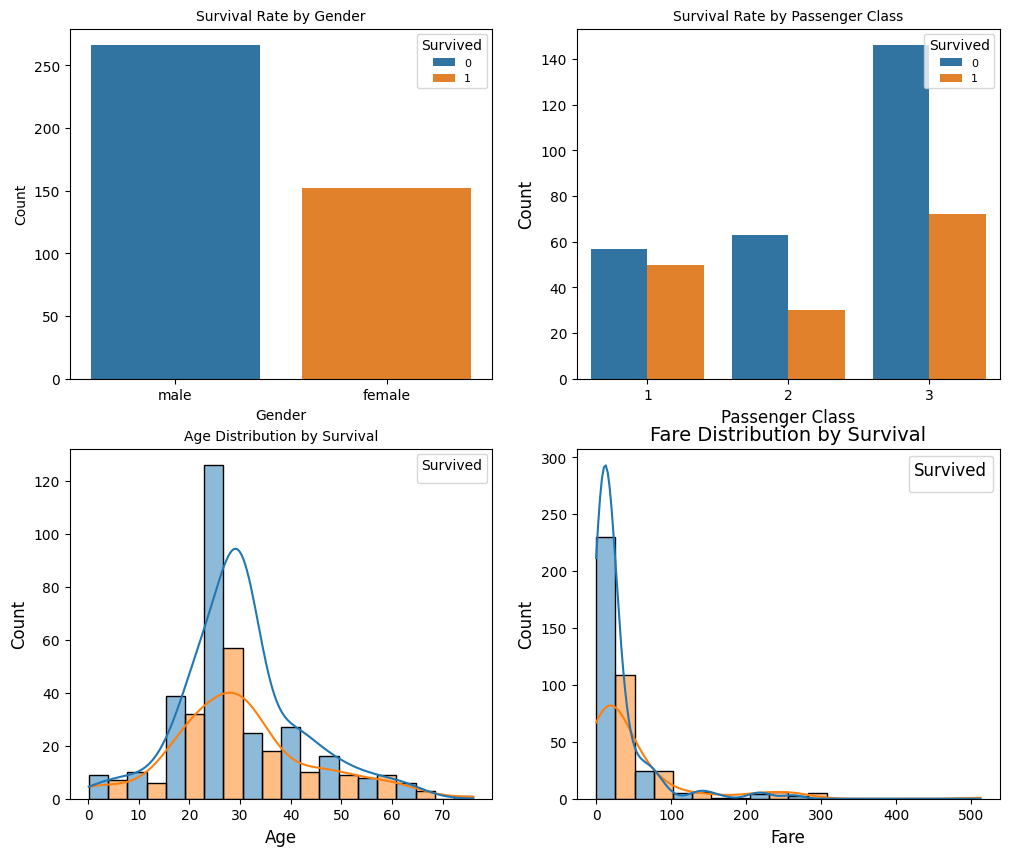

<Figure size 640x480 with 0 Axes>

In [ ]:

plt.figure(figsize=(12, 10))


plt.subplot(2, 2, 1)
sns.countplot(x='Sex', hue='Survived', data=df)
plt.title('Survival Rate by Gender', fontsize=10)
plt.xlabel('Gender', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(title='Survived', loc='upper right', fontsize=8, title_fontsize=10)


plt.subplot(2, 2, 2)
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Rate by Passenger Class', fontsize=10)
plt.xlabel('Passenger Class', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', fontsize=8, title_fontsize=10)


plt.subplot(2, 2, 3)
sns.histplot(data=df, x='Age', hue='Survived', multiple='dodge', bins=10, kde=True)
plt.title('Age Distribution by Survival', fontsize=10)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', fontsize=8, title_fontsize=10)

plt.subplot(2,2,4)
sns.histplot(data=df, x='Fare', hue='Survived', multiple='dodge', bins=10, kde=True)
plt.title('Fare Distribution by Survival', fontsize=14)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', fontsize=10, title_fontsize=12)
plt.show()


plt.tight_layout()
plt.show()


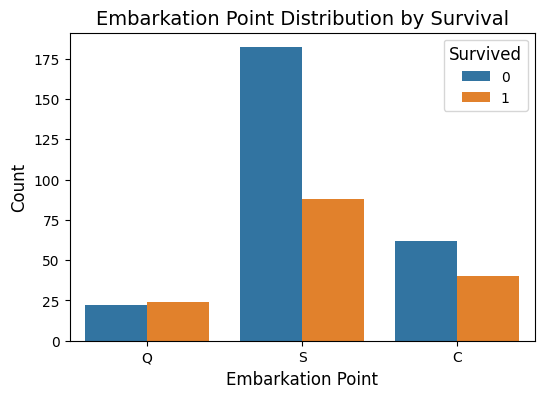

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Embarkation Point Distribution by Survival', fontsize=14)
plt.xlabel('Embarkation Point', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Survived', loc='upper right', fontsize=10, title_fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()


**Converting categorical data into Numerical data**

In [ ]:
df["Sex"].replace("male",1,inplace=True)
df["Sex"].replace("female",0,inplace=True)
df["Embarked"].replace("Q",0,inplace=True)
df["Embarked"].replace("S",1,inplace=True)
df["Embarked"].replace("C",2,inplace=True)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0,0,7.8292,0
1,1,3,0,47.0,1,0,7.0000,1
2,0,2,1,62.0,0,0,9.6875,0
3,0,3,1,27.0,0,0,8.6625,1
4,1,3,0,22.0,1,1,12.2875,1


In [ ]:
df["Age"]=df["Age"].astype(int)
#df["Fare"]=df["Fare"].round().astype(int)

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34,0,0,7.8292,0
1,1,3,0,47,1,0,7.0000,1
2,0,2,1,62,0,0,9.6875,0
3,0,3,1,27,0,0,8.6625,1
4,1,3,0,22,1,1,12.2875,1


In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [ ]:
x=df.iloc[0:418,1:8]
y=df.iloc[0:418,0]

In [ ]:
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34,0,0,7.8292,0
1,3,0,47,1,0,7.0000,1
2,2,1,62,0,0,9.6875,0
3,3,1,27,0,0,8.6625,1
4,3,0,22,1,1,12.2875,1
...,...,...,...,...,...,...,...
413,3,1,30,0,0,8.0500,1
414,1,0,39,0,0,108.9000,2
415,3,1,38,0,0,7.2500,1
416,3,1,30,0,0,8.0500,1


In [ ]:
y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.4)
model=LogisticRegression()
model.fit(x_train,y_train)
predictions=model.predict(x_test)
print('y_predicted values')
print(predictions)

y_predicted values
[1 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1 0 1 1
 0 0 0 0 1 0 0 0 0 1 0 0 1 1 1 0 1 0 1 0 0 0 0 0 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0
 1 0 1 0 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0]


In [ ]:
print('y_test')
print(y_test)

y_test
414    1
59     1
174    0
245    0
12     1
      ..
377    0
360    0
234    0
379    0
257    0
Name: Survived, Length: 168, dtype: int64


In [ ]:

print('Accuracy',accuracy_score(predictions,y_test))

Accuracy 1.0
